<a href="https://colab.research.google.com/github/vishalrshukla/Learnings/blob/master/Logistic_Regression_by_Hand.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math as math
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, explained_variance_score

In [2]:
SampleDF=pd.DataFrame({'Hours(X)':[29,15,33,26,39,16,30,12,32,19],
                      'Result(Y)':[1,0,1,0,1,0,1,0,1,0]
})
SampleDF

,Hours(X),Result(Y)
0,29,1
1,15,0
2,33,1
3,26,0
4,39,1
5,16,0
6,30,1
7,12,0
8,32,1
9,19,0


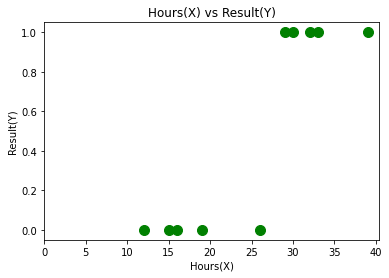

In [3]:
plt.scatter('Hours(X)','Result(Y)',c='green', s=100,  data=SampleDF)
plt.ylim(bottom=-0.05)
plt.xlim(left=0)
plt.title(label="Hours(X) vs Result(Y)",loc='center')
plt.xlabel('Hours(X)')
plt.ylabel('Result(Y)')
plt.show()

In [4]:
## MeanX , MeanY & Count of Rows(N)
n=SampleDF['Hours(X)'].count()
MeanX=SampleDF['Hours(X)'].mean()
MeanY=SampleDF['Result(Y)'].mean()
print('No of Element :',n)
print('Mean of X :', MeanX)
print('Mean of Y : ',MeanY)
SampleDF

No of Element : 10
Mean of X : 25.1
Mean of Y :  0.5


,Hours(X),Result(Y)
0,29,1
1,15,0
2,33,1
3,26,0
4,39,1
5,16,0
6,30,1
7,12,0
8,32,1
9,19,0


In [5]:
SampleDF['X-MeanX']=SampleDF['Hours(X)'].map(lambda a: a-MeanX )
SampleDF['Y-MeanY']=SampleDF['Result(Y)'].map(lambda a: a-MeanY )
SampleDF['X-MeanX*Y-MeanY']=SampleDF['X-MeanX']*SampleDF['Y-MeanY']
SampleDF['X-MeanX**2']=SampleDF['X-MeanX'].map(lambda a: a**2)
SampleDF['Y-MeanY**2']=SampleDF['Y-MeanY'].map(lambda a: a**2)
SampleDF

,Hours(X),Result(Y),X-MeanX,Y-MeanY,X-MeanX*Y-MeanY,X-MeanX**2,Y-MeanY**2
0,29,1,3.9,0.5,1.95,15.21,0.25
1,15,0,-10.1,-0.5,5.05,102.01,0.25
2,33,1,7.9,0.5,3.95,62.41,0.25
3,26,0,0.9,-0.5,-0.45,0.81,0.25
4,39,1,13.9,0.5,6.95,193.21,0.25
5,16,0,-9.1,-0.5,4.55,82.81,0.25
6,30,1,4.9,0.5,2.45,24.01,0.25
7,12,0,-13.1,-0.5,6.55,171.61,0.25
8,32,1,6.9,0.5,3.45,47.61,0.25
9,19,0,-6.1,-0.5,3.05,37.21,0.25


In [6]:
Numrator=SampleDF['X-MeanX*Y-MeanY'].sum()
Dinominator=math.sqrt(SampleDF['X-MeanX**2'].sum()*SampleDF['Y-MeanY**2'].sum())
r=Numrator/Dinominator
print('Persion Corelation Coeefficent(r) : ', r)

Persion Corelation Coeefficent(r) :  0.8736892359345642


In [7]:
Sy=math.sqrt(SampleDF['Y-MeanY**2'].sum()/(n-1))
Sx=math.sqrt(SampleDF['X-MeanX**2'].sum()/(n-1))

In [8]:
b=r*(Sy/Sx)
print('Slope(b) of Regerssion Line',b)

Slope(b) of Regerssion Line 0.050888858732528165


In [9]:
a= MeanY-(b*MeanX)
print('Y-Intercept(a) of Regeression Line : ', a)

Y-Intercept(a) of Regeression Line :  -0.777310354186457


In [10]:
z=a+b*16
print(z)
p=1/(1 + math.exp(-z))
p

0.036911385533993646


0.5092267988193211

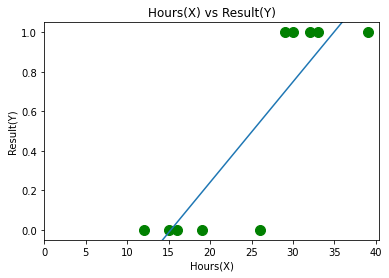

In [11]:
plt.scatter('Hours(X)','Result(Y)',c='green', s=100,  data=SampleDF)
plt.ylim(bottom=-0.05)
plt.xlim(left=0)
plt.plot(pd.RangeIndex(0,40),a +(b*pd.RangeIndex(0,40) ))
plt.title(label="Hours(X) vs Result(Y)",loc='center')
plt.xlabel('Hours(X)')
plt.ylabel('Result(Y)')
plt.show()

In [12]:
SampleDF['Odd'] = SampleDF['Hours(X)'].map(lambda x: b*x+a )
SampleDF['yPred'] = np.round(SampleDF['Odd'].map(lambda x: 1/(1 + math.exp(-x)) ),2)
SampleDF['Predicted(Y)']=SampleDF['yPred'].map(lambda x: 1 if x > 0.50 else 0 )
SampleDF

,Hours(X),Result(Y),X-MeanX,Y-MeanY,X-MeanX*Y-MeanY,X-MeanX**2,Y-MeanY**2,Odd,yPred,Predicted(Y)
0,29,1,3.9,0.5,1.95,15.21,0.25,0.698467,0.67,1
1,15,0,-10.1,-0.5,5.05,102.01,0.25,-0.013977,0.50,0
2,33,1,7.9,0.5,3.95,62.41,0.25,0.902022,0.71,1
3,26,0,0.9,-0.5,-0.45,0.81,0.25,0.545800,0.63,1
4,39,1,13.9,0.5,6.95,193.21,0.25,1.207355,0.77,1
5,16,0,-9.1,-0.5,4.55,82.81,0.25,0.036911,0.51,1
6,30,1,4.9,0.5,2.45,24.01,0.25,0.749355,0.68,1
7,12,0,-13.1,-0.5,6.55,171.61,0.25,-0.166644,0.46,0
8,32,1,6.9,0.5,3.45,47.61,0.25,0.851133,0.70,1
9,19,0,-6.1,-0.5,3.05,37.21,0.25,0.189578,0.55,1


In [13]:
from sklearn.metrics import confusion_matrix
SampleConfusionMatrix=confusion_matrix(SampleDF['Result(Y)'],SampleDF['Predicted(Y)'],labels=[0,1]).ravel()
TrueNegative_TN=SampleConfusionMatrix[0]
TruePositive_TP=SampleConfusionMatrix[3]
FalsePositive_FP=SampleConfusionMatrix[1]
FalseNegative_FN=SampleConfusionMatrix[2]
ACCUARY=(TruePositive_TP+TrueNegative_TN)/(TrueNegative_TN+TruePositive_TP+FalsePositive_FP+FalseNegative_FN)
ACCUARY

0.7

---
# Below is Linear Regression with Gradient Descent
### Gradient descent is an iterative optimization algorithm to find the minimum of a function. Here that function is our Loss Function.

In [14]:
GDSampleDF=SampleDF
GDSampleDF

,Hours(X),Result(Y),X-MeanX,Y-MeanY,X-MeanX*Y-MeanY,X-MeanX**2,Y-MeanY**2,Odd,yPred,Predicted(Y)
0,29,1,3.9,0.5,1.95,15.21,0.25,0.698467,0.67,1
1,15,0,-10.1,-0.5,5.05,102.01,0.25,-0.013977,0.50,0
2,33,1,7.9,0.5,3.95,62.41,0.25,0.902022,0.71,1
3,26,0,0.9,-0.5,-0.45,0.81,0.25,0.545800,0.63,1
4,39,1,13.9,0.5,6.95,193.21,0.25,1.207355,0.77,1
5,16,0,-9.1,-0.5,4.55,82.81,0.25,0.036911,0.51,1
6,30,1,4.9,0.5,2.45,24.01,0.25,0.749355,0.68,1
7,12,0,-13.1,-0.5,6.55,171.61,0.25,-0.166644,0.46,0
8,32,1,6.9,0.5,3.45,47.61,0.25,0.851133,0.70,1
9,19,0,-6.1,-0.5,3.05,37.21,0.25,0.189578,0.55,1


In [17]:
def logistic_regression(GDSampleDF):
#Initialize Variable 
  m = 0
  c = 0
  L = 0.01
  n = GDSampleDF['Hours(X)'].count()
  epoch = 300
 
  for i in range(epoch):
    GDSampleDF['z'] = GDSampleDF['X-MeanX'].map(lambda x: m*x+c )
    GDSampleDF['GDyPred'] = np.round(GDSampleDF['z'].map(lambda x: 1/(1 + math.exp(-x)) ),2)
    GDSampleDF['Diff-in-Y'] = GDSampleDF['Result(Y)'] - GDSampleDF['GDyPred']
    GDSampleDF['1-GDyPred'] = 1 - GDSampleDF['GDyPred']
    GDSampleDF['Diff-y-Square'] = GDSampleDF['Diff-in-Y'].map(lambda y: y**2)
    GDSampleDF['Par-for-Dc'] = GDSampleDF['Diff-in-Y'] * GDSampleDF['GDyPred'] * GDSampleDF['1-GDyPred']
    GDSampleDF['Par-for-Dm'] = GDSampleDF['Par-for-Dc'] * GDSampleDF['X-MeanX']

    Dm = (-2) * GDSampleDF['Par-for-Dm'].sum()
    Dc = (-2) * GDSampleDF['Par-for-Dc'].sum()
    error = GDSampleDF['Diff-y-Square'].sum()
    
    m = m - L * Dm
    c = c - L * Dc
    
  return m, c 

In [18]:
b1, b0 = logistic_regression(GDSampleDF)
print("Slope of the line m = ", b1)
print("Y-intercept of the line c = ", b0)


Slope of the line m =  0.5831916960000015
Y-intercept of the line c =  -0.5936017599999998


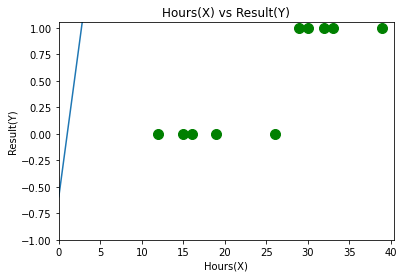

In [19]:
plt.scatter('Hours(X)','Result(Y)',c='green', s=100,  data=SampleDF)
plt.ylim(bottom=-1)
plt.xlim(left=0)
plt.plot(pd.RangeIndex(0,40),b0 +(b1*pd.RangeIndex(0,40) ))
plt.title(label="Hours(X) vs Result(Y)",loc='center')
plt.xlabel('Hours(X)')
plt.ylabel('Result(Y)')
plt.show()

In [21]:
GDSampleDF['GDPredicted(Y)']=GDSampleDF['GDyPred'].map(lambda x: 1 if x > 0.50 else 0 )
GDSampleDF

,Hours(X),Result(Y),X-MeanX,Y-MeanY,X-MeanX*Y-MeanY,X-MeanX**2,Y-MeanY**2,Odd,yPred,Predicted(Y),z,GDyPred,Diff-in-Y,1-GDyPred,Diff-y-Square,Par-for-Dc,Par-for-Dm,GDPredicted(Y)
0,29,1,3.9,0.5,1.95,15.21,0.25,0.698467,0.67,1,1.680801,0.84,0.16,0.16,0.0256,0.021504,0.083866,1
1,15,0,-10.1,-0.5,5.05,102.01,0.25,-0.013977,0.50,0,-6.477256,0.00,0.00,1.00,0.0000,0.000000,-0.000000,0
2,33,1,7.9,0.5,3.95,62.41,0.25,0.902022,0.71,1,4.011674,0.98,0.02,0.02,0.0004,0.000392,0.003097,1
3,26,0,0.9,-0.5,-0.45,0.81,0.25,0.545800,0.63,1,-0.067354,0.48,-0.48,0.52,0.2304,-0.119808,-0.107827,0
4,39,1,13.9,0.5,6.95,193.21,0.25,1.207355,0.77,1,7.507984,1.00,0.00,0.00,0.0000,0.000000,0.000000,1
5,16,0,-9.1,-0.5,4.55,82.81,0.25,0.036911,0.51,1,-5.894537,0.00,0.00,1.00,0.0000,0.000000,-0.000000,0
6,30,1,4.9,0.5,2.45,24.01,0.25,0.749355,0.68,1,2.263519,0.91,0.09,0.09,0.0081,0.007371,0.036118,1
7,12,0,-13.1,-0.5,6.55,171.61,0.25,-0.166644,0.46,0,-8.225411,0.00,0.00,1.00,0.0000,0.000000,-0.000000,0
8,32,1,6.9,0.5,3.45,47.61,0.25,0.851133,0.70,1,3.428956,0.97,0.03,0.03,0.0009,0.000873,0.006024,1
9,19,0,-6.1,-0.5,3.05,37.21,0.25,0.189578,0.55,1,-4.146382,0.02,-0.02,0.98,0.0004,-0.000392,0.002391,0


In [22]:
GDConfusionMatrix=confusion_matrix(GDSampleDF['Result(Y)'],GDSampleDF['GDPredicted(Y)'],labels=[0,1]).ravel()
GD_TN=GDConfusionMatrix[0]
GD_TP=GDConfusionMatrix[3]
GD_FP=GDConfusionMatrix[1]
GD_FN=GDConfusionMatrix[2]
GD_ACCUARY=(GD_TP+GD_TN)/(GD_TN+GD_TP+GD_FP+GD_FN)
GD_ACCUARY

1.0